In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train_df = pd.read_csv('./train_2016_v2.csv', parse_dates=["transactiondate"])
props_df = pd.read_csv('./properties_2016.csv')
sample_df = pd.read_csv('./sample_submission.csv')

/Users/diegogallegos/anaconda2/envs/zillow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [8]:
sample_df.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [9]:
props_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [10]:
# Data Shape
print(train_df.shape)
print(props_df.shape)

(90275, 3)
(2985217, 58)


## Logerror

Lets see how the target variable behaves

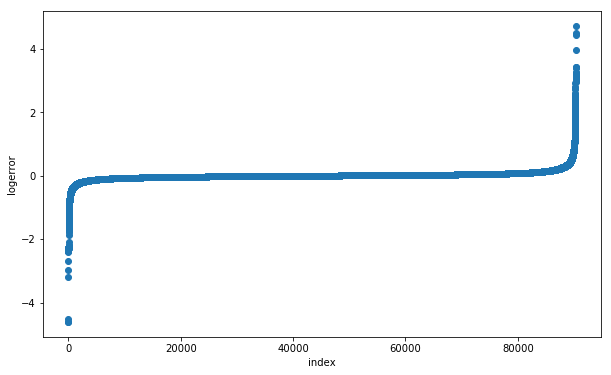

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize=10)
plt.ylabel('logerror', fontsize=10)
plt.show()

### Logerror distribution

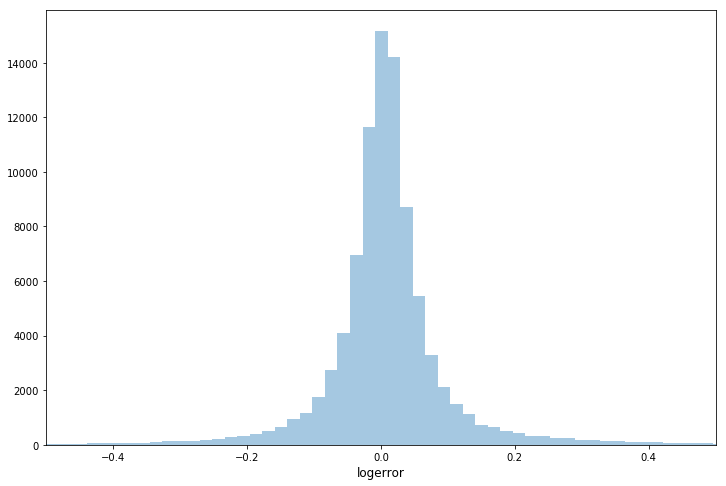

In [12]:
fig = plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=500, kde=False)
plt.xlabel('logerror', fontsize=12)

# Get current axis to appreciate the distribution closer
ax = fig.gca()
ax.set_xlim([-0.5,0.5])
plt.show()

## Seasonal Analysis: Transaction Date

### Plot the date of the transaction of each property

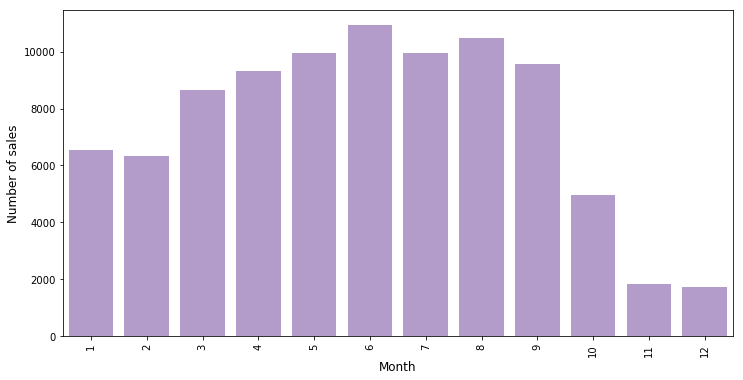

In [13]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month

count_unique_txn_values = train_df['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count_unique_txn_values.index, 
            count_unique_txn_values.values, alpha=0.7, color=color[4])
plt.xticks(rotation='vertical')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of sales', fontsize=12)
plt.show()

## Research for seasonal analysis

## Data cleansing: Properties 

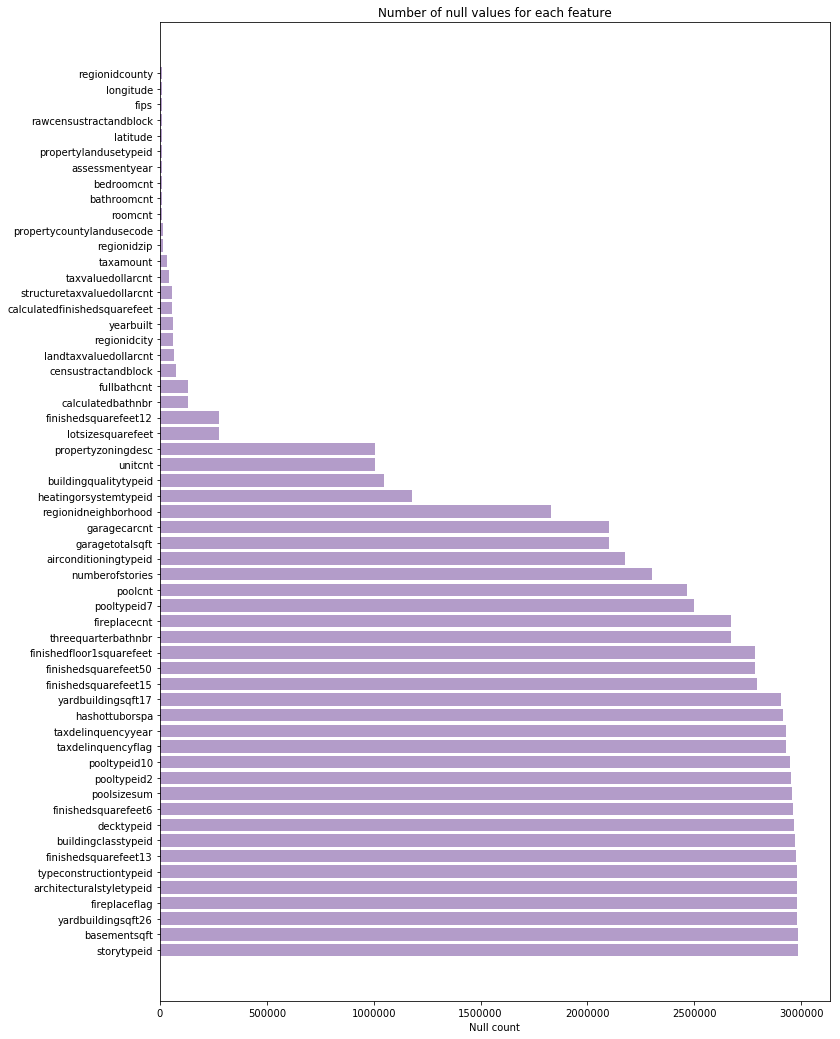

In [14]:
null_df = props_df.isnull().sum(axis=0).reset_index()
null_df.columns = ['column_name', 'null_count']
null_df = null_df.loc[null_df['null_count'] > 0]
null_df = null_df.sort_values(by='null_count', ascending=False)

indices = np.arange(null_df.shape[0])
figure, axes = plt.subplots(figsize=(12,18))
rects = axes.barh(indices, null_df.null_count.values, color='#b39cc9')
axes.set_yticks(indices)
axes.set_yticklabels(null_df.column_name.values, rotation='horizontal')
axes.set_xlabel('Null count')
axes.set_title("Number of null values for each feature")
plt.show()

## Merge Data


In [15]:
merged_train_df = pd.merge(train_df, props_df, on='parcelid', how='left')
# print(merged_train_df.shape)
merged_train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


## Analize columns and remove those with high percentage of missing values

In [16]:
# Count number of columns per type
dtype_df = merged_train_df.dtypes.reset_index()
dtype_df.columns = ['Count', 'Type']
dtype_df.groupby('Type').aggregate('count').reset_index()

,Type,Count
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


In [17]:
merged_null_df = merged_train_df.isnull().sum(axis=0).reset_index()
merged_null_df.columns = ['column_name', 'null_count']
merged_null_df['null_ratio'] = merged_null_df['null_count'] / merged_train_df.shape[0]
# merged_null_df.sort_values(by='null_ratio', ascending=True)
merged_null_df.loc[merged_null_df['null_ratio'] > 0.80]

,column_name,null_count,null_ratio
5,architecturalstyletypeid,90014,0.997109
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
12,decktypeid,89617,0.992711
13,finishedfloor1squarefeet,83419,0.924054
16,finishedsquarefeet13,90242,0.999634
17,finishedsquarefeet15,86711,0.960521
18,finishedsquarefeet50,83419,0.924054
19,finishedsquarefeet6,89854,0.995336
21,fireplacecnt,80668,0.893581


## Correlation Analysis

/Users/diegogallegos/anaconda2/envs/zillow/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/diegogallegos/anaconda2/envs/zillow/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


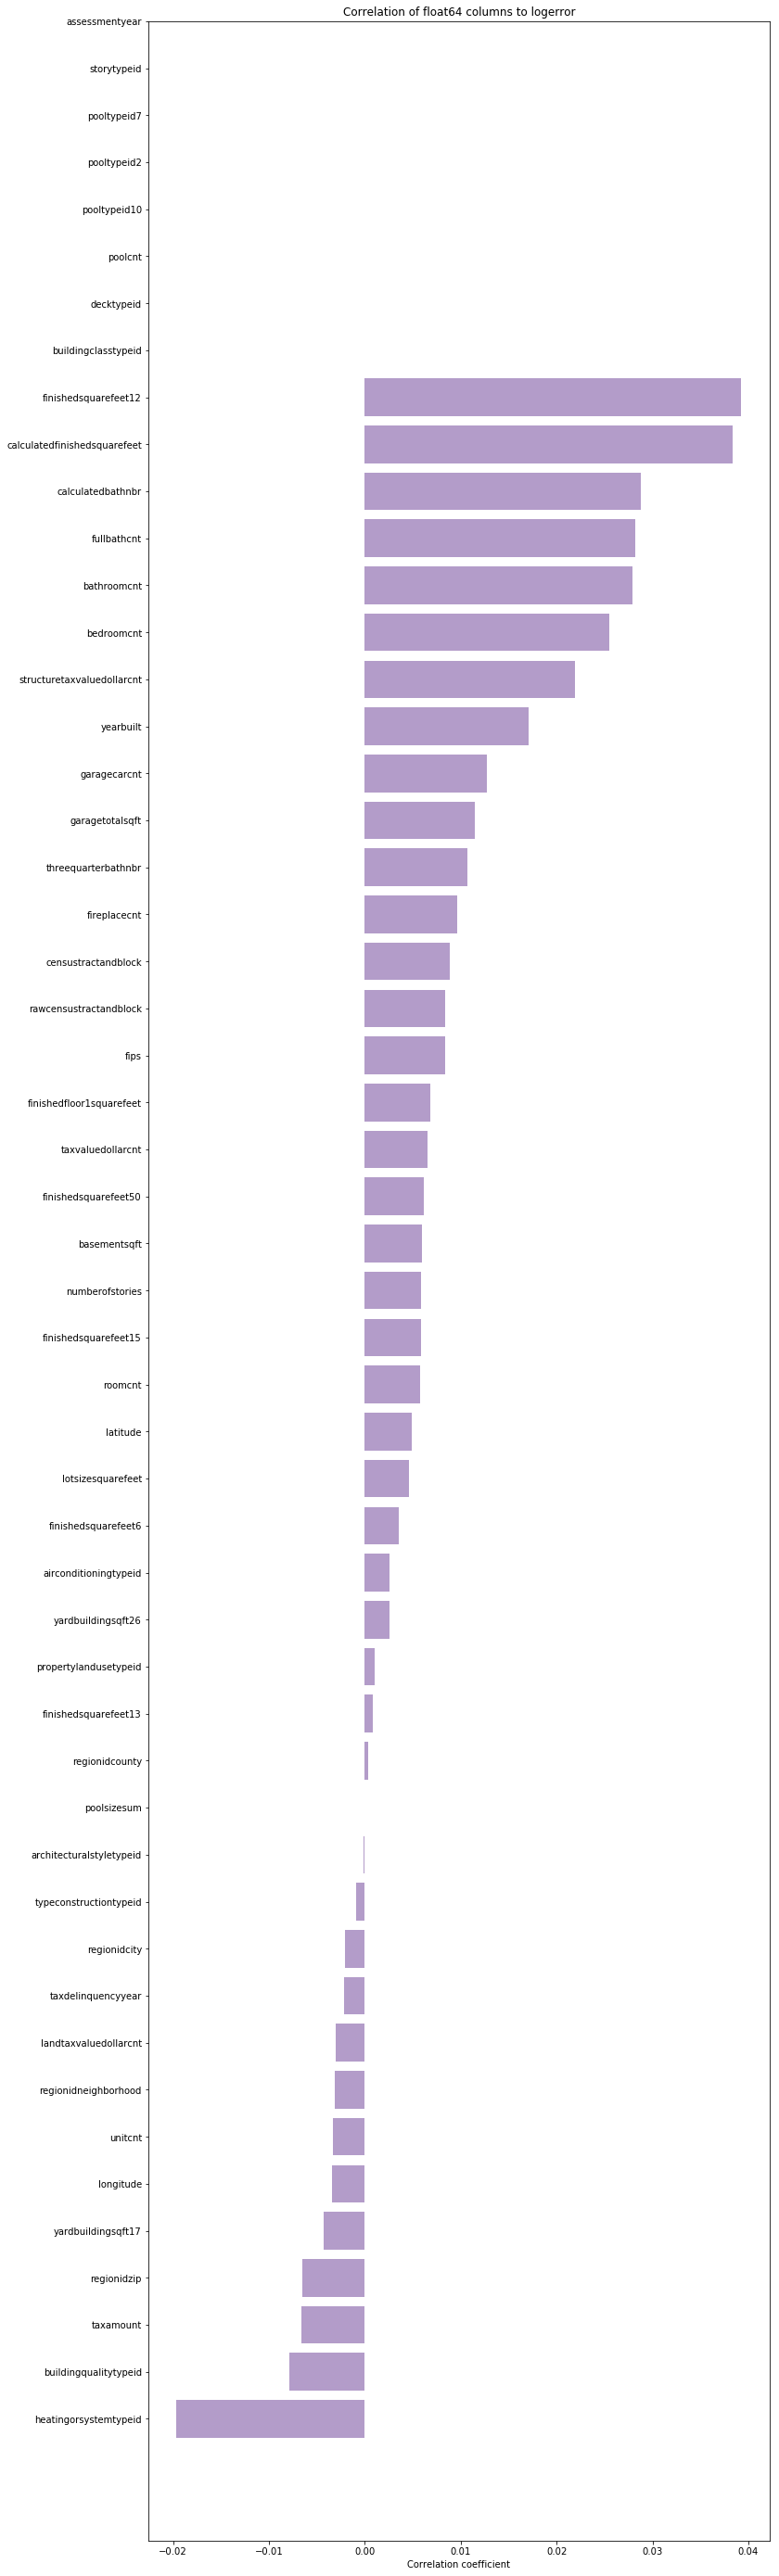

In [18]:
# Fill null values with the mean
filled_train_df = merged_train_df.fillna(merged_train_df.mean(axis=0), inplace=True)

float64_columns = list(filter(lambda col: (filled_train_df[col].dtype == 'float64')
                        and (col != 'logerror'), filled_train_df.columns))

correlation_logerror = list(map(lambda col: np.corrcoef(filled_train_df[col].values, 
            filled_train_df['logerror'].values)[0,1], float64_columns))

corr_df = pd.DataFrame({'cols': float64_columns, 
                        'correlation_logerror': correlation_logerror})

corr_df = corr_df.sort_values(by='correlation_logerror')

indices = np.arange(len(float64_columns))
fig, ax = plt.subplots(figsize=(12, 50))
rects = ax.barh(indices, np.array(corr_df.correlation_logerror.values), color='#b39cc9')
ax.set_yticks(indices)
ax.set_yticklabels(corr_df.cols.values, rotation='horizontal')
ax.set_xlabel('Correlation coefficient')
ax.set_title('Correlation of float64 columns to logerror')
plt.show()

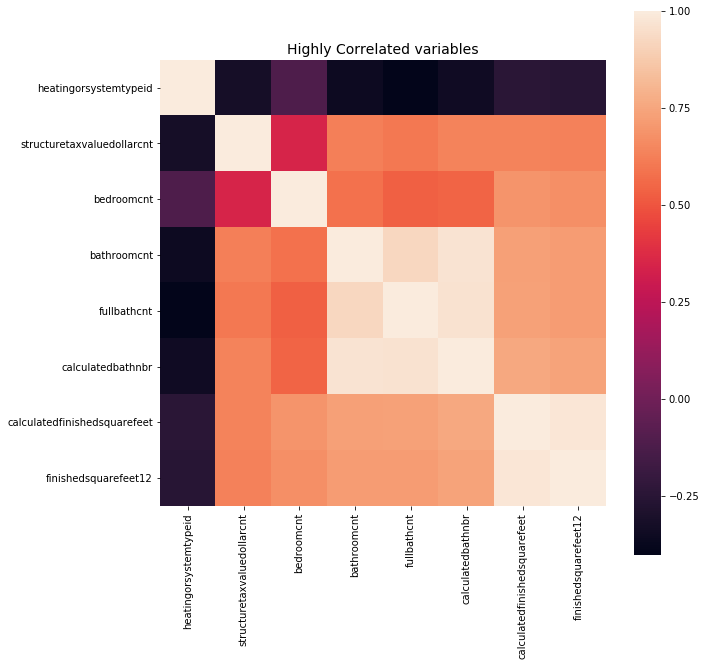

,cols,correlation_logerror
21,heatingorsystemtypeid,-0.019648
45,structuretaxvaluedollarcnt,0.021935
4,bedroomcnt,0.025467
3,bathroomcnt,0.027889
18,fullbathcnt,0.028169
7,calculatedbathnbr,0.028758
10,calculatedfinishedsquarefeet,0.038341
11,finishedsquarefeet12,0.039248


In [19]:
high_correlation_cols = corr_df.loc[(corr_df['correlation_logerror'] > 0.02) | 
                                  (corr_df['correlation_logerror'] < -0.01)]

corrmat = filled_train_df[high_correlation_cols.cols.tolist()].corr(method='spearman')
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrmat, vmax=1., square=True)
plt.title('Highly Correlated variables', fontsize=14)
plt.show()

high_correlation_cols

In [20]:
#### pd.options.display.max_rows = 65

dtypes_df = filled_train_df.dtypes.reset_index()
dtypes_df.columns = ['Column', 'Type']
dtypes_df

,Column,Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


### Imputation
- Median
- Mean

In [21]:
# Drop outliers
merged_train_df = merged_train_df[ merged_train_df.logerror > -0.4 ]
merged_train_df = merged_train_df[ merged_train_df.logerror < 0.419 ]

# Imputation
mean_filled_df = merged_train_df.fillna(merged_train_df.mean(axis=0), inplace=True)
median_filled_df = merged_train_df.fillna(merged_train_df.median(axis=0), inplace=True)

### Feature Importance
- Compare ExtraTreesRegressor vs Xgboost

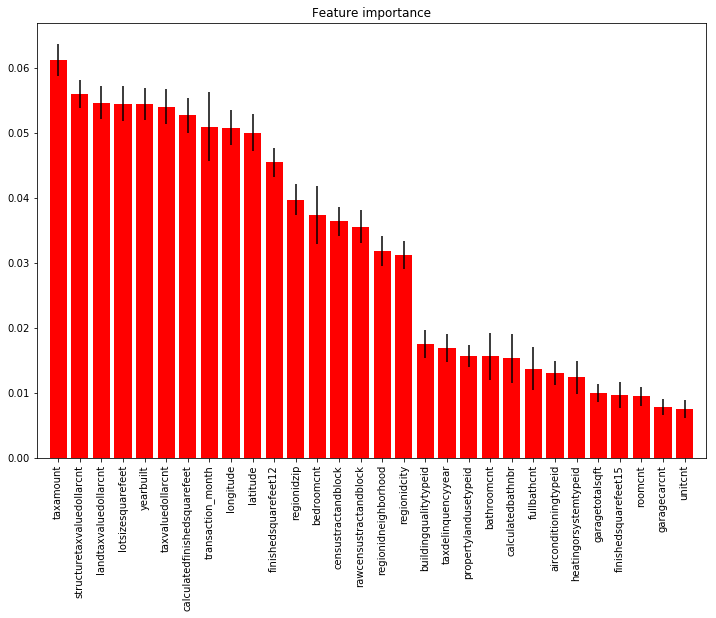

In [22]:
from sklearn.ensemble import ExtraTreesRegressor

def plot_feature_importance(X,y):
    # fit tree regressor model
    n_estimators = 30
    model = ExtraTreesRegressor(n_estimators=n_estimators, max_depth=30, max_features=0.3, 
                              n_jobs=-1, random_state=10)
    model.fit(X, y)
    
    # prepare data to plot
    feature_names = X.columns.values
    feature_importance = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(feature_importance)[::-1][:n_estimators]
    
    # Plot feature importance
    plt.figure(figsize=(12,8))
    plt.title('Feature importance')
    plt.bar(range(len(indices)), feature_importance[indices], color='r', yerr=std[indices], align='center')
    plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical')
    plt.xlim([-1, len(indices)])
    plt.show()

categorical_columns = ['taxdelinquencyflag', 'fireplaceflag', 'propertyzoningdesc', 
                       'propertycountylandusecode', 'hashottuborspa']

train_Y = mean_filled_df['logerror'].values
train_X = mean_filled_df.drop(['parcelid', 'logerror', 'transactiondate'] 
                               + categorical_columns, axis=1)

# train_median_Y = median_filled_df['logerror'].values
# train_median_X = median_filled_df.drop(['parcelid', 'logerror', 'transactiondate'] 
#                                + categorical_columns, axis=1)

plot_feature_importance(train_X, train_Y)
# plot_feature_importance(train_median_X, train_median_Y)


    

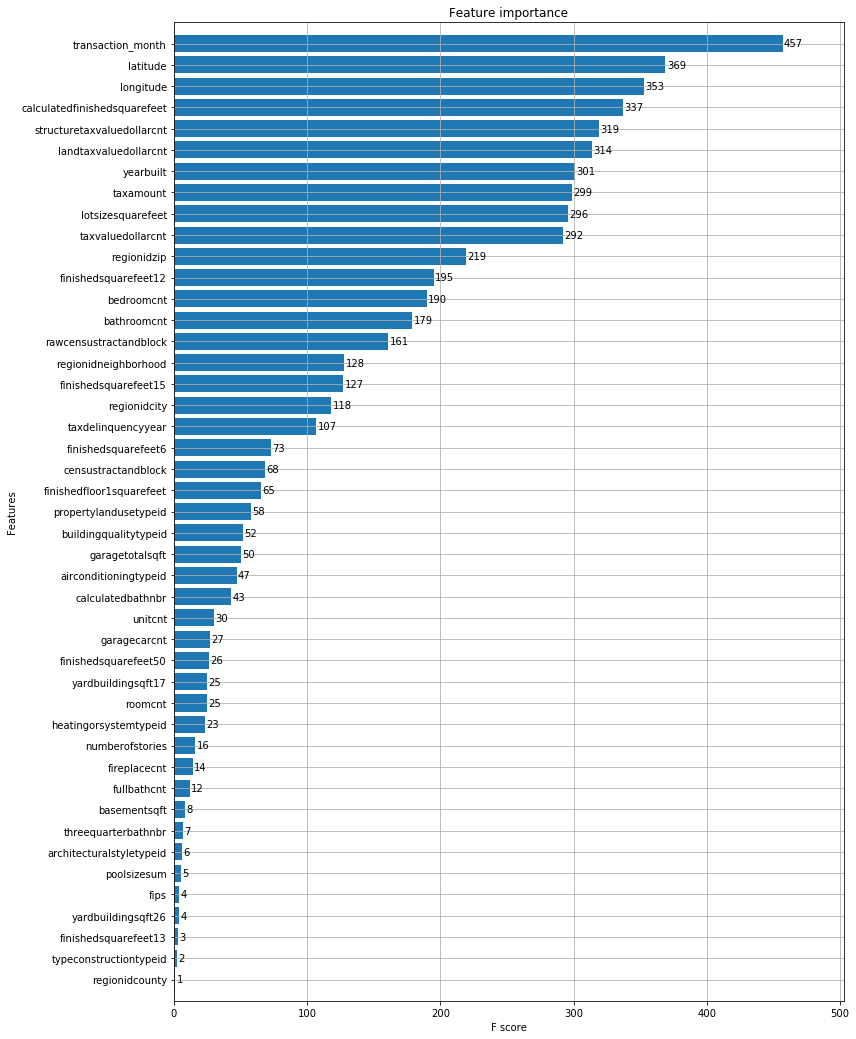

In [23]:
import xgboost as xgb

def plot_xgboost_feature_importance(X, y):
    xgb_params = {
        'eta': 0.05,
        'max_depth': 8,
        'subsample': 0.7,
        'colsample_bytree': 0.7,
        'objective': 'reg:linear',
        'silent': 1,
        'seed' : 0
    }
    feature_names = X.columns.values
    dtrain = xgb.DMatrix(X, y, feature_names=feature_names)
    model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

    # plot the important features #
    fig, ax = plt.subplots(figsize=(12,18))
    xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
    plt.show()

plot_xgboost_feature_importance(train_X, train_Y)
# plot_xgboost_feature_importance(train_median_X, train_median_Y)

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
non_number_columns = train_X.dtypes[train_X.dtypes == object].index.values
non_number_columns

/Users/diegogallegos/anaconda2/envs/zillow/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-01-10 10:42:32.130852. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


array([], dtype=object)

## Data Augmentation

Add new features

In [27]:
#life of property
train_X['N-life'] = 2018 - train_X['yearbuilt']

#error in calculation of the finished living area of home
train_X['N-LivingAreaError'] = train_X['calculatedfinishedsquarefeet']/train_X['finishedsquarefeet12']

#proportion of living area
train_X['N-LivingAreaProp'] = train_X['calculatedfinishedsquarefeet']/train_X['lotsizesquarefeet']
train_X['N-LivingAreaProp2'] = train_X['finishedsquarefeet12']/train_X['finishedsquarefeet15']

#Amout of extra space
train_X['N-ExtraSpace'] = train_X['lotsizesquarefeet'] - train_X['calculatedfinishedsquarefeet'] 
train_X['N-ExtraSpace-2'] = train_X['finishedsquarefeet15'] - train_X['finishedsquarefeet12'] 

#Total number of rooms
train_X['N-TotalRooms'] = train_X['bathroomcnt']*train_X['bedroomcnt']

#Average room size
train_X['N-AvRoomSize'] = train_X['calculatedfinishedsquarefeet']/train_X['roomcnt'] 

# Number of Extra rooms
train_X['N-ExtraRooms'] = train_X['roomcnt'] - train_X['N-TotalRooms'] 

#Ratio of the built structure value to land area
train_X['N-ValueProp'] = train_X['structuretaxvaluedollarcnt']/train_X['landtaxvaluedollarcnt']

#Does property have a garage, pool or hot tub and AC?
train_X['N-GarPoolAC'] = ((train_X['garagecarcnt']>0) & (train_X['pooltypeid10']>0) & (train_X['airconditioningtypeid']!=5))*1 

train_X["N-location"] = train_X["latitude"] + train_X["longitude"]
train_X["N-location-2"] = train_X["latitude"]*train_X["longitude"]
train_X["N-location-2round"] = train_X["N-location-2"].round(-4)

train_X["N-latitude-round"] = train_X["latitude"].round(-4)
train_X["N-longitude-round"] = train_X["longitude"].round(-4)

/Users/diegogallegos/anaconda2/envs/zillow/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-01-10 10:44:49.883142. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


### Hyperparameter optimization

This part takes about 24 hrs to run (each segment). Tested on a MacBook Pro 2017 16GB Ram 500GB SD i7. Later on ran on a hetzner.com machine which ran in less than 8 with 64GB Ram.

In [59]:
from xgboost.sklearn import XGBRegressor
from sklearn import cross_validation, metrics   
from sklearn.grid_search import GridSearchCV   

target = "logerror"
id_col = "parcelid"

def fit_model(alg, dtrain, predictors,use_train_cv=True, cv_folds=5, early_stopping_rounds=50):
    
    if use_train_cv:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        result = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='mae', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=result.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['logerror'],eval_metric='mae')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['logerror'].values, dtrain_predictions))
    print("MAE Score (Train): %f" % metrics.mean_squared_error(dtrain['logerror'], dtrain_predictions))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

/Users/diegogallegos/anaconda2/envs/zillow/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/diegogallegos/anaconda2/envs/zillow/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [61]:
predictors = [x for x in train_X.columns if x not in [target, id_col]]

xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=0)

fit_model(xgb1, pd.concat([train_X, pd.DataFrame(train_Y, columns=['logerror'])]), predictors)

KeyError: 'best_msg'

In [ ]:
param_test1 = {
 'max_depth': list(range(3,10,2)),
 'min_child_weight': list(range(1,6,2))`
}

gsearch1 = GridSearchCV(estimator=XGBClassifier(
                                    learning_rate =0.1, 
                                    n_estimators=140, max_depth=5,
                                    min_child_weight=1, 
                                    gamma=0, 
                                    subsample=0.8, 
                                    colsample_bytree=0.8,
                                    objective= 'reg:linear', 
                                    nthread=4, 
                                    scale_pos_weight=1, 
                                    seed=0), 
                        param_grid = param_test1, 
                        scoring='neg_mean_squared_error',
                        n_jobs=4,
                        iid=False, 
                        cv=5)
gsearch1.fit(train_X[predictors], train_Y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

## Training

### XGBOOST

In [21]:
def train(X, y):
    # Split data
    x_train, x_valid , y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=43)                                     

    train_columns = x_train.columns

    # Build DMatrices for training and validation
    d_train = xgb.DMatrix(x_train, y_train)
    d_valid = xgb.DMatrix(x_valid, y_valid)

    # Xgboost Training
    xgb_params = {
        'eta': 0.02,
        'max_depth': 4,
        'subsample': 0.7,
        'colsample_bytree': 0.7,
        'objective': 'reg:linear',
        'eval_metric': 'mae',
        'silent': 1,
        'seed' : 0
    }
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    clf = xgb.train(xgb_params, d_train, 10000, 
                    watchlist, early_stopping_rounds=100, verbose_eval=10)

    # Build Test Dataframe
    df_test = props_df.drop(['parcelid'], axis=1)
    df_test["transactiondate"] = '2016-07-01'
    df_test["transactiondate"] = pd.to_datetime(df_test["transactiondate"])
    df_test["transaction_month"] = df_test["transactiondate"].dt.month #should use the most common training date 2016-10-01
    x_test = df_test[train_columns] 
    # Build Test DMatrix
    d_test = xgb.DMatrix(x_test)
    # Return predicted data
    return clf.predict(d_test)

p_test = train(train_X, train_Y)

pd.DataFrame(p_test).head()

/Users/diegogallegos/anaconda2/envs/zillow/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-09-17 23:20:15.599992. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


[0]	train-mae:0.482601	valid-mae:0.482376
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
[10]	train-mae:0.394327	valid-mae:0.394104
[20]	train-mae:0.322668	valid-mae:0.322439
[30]	train-mae:0.264875	valid-mae:0.264604
[40]	train-mae:0.218335	valid-mae:0.218083
[50]	train-mae:0.181044	valid-mae:0.180809
[60]	train-mae:0.151311	valid-mae:0.151121
[70]	train-mae:0.12771	valid-mae:0.127584
[80]	train-mae:0.109126	valid-mae:0.109107
[90]	train-mae:0.094652	valid-mae:0.094698
[100]	train-mae:0.083542	valid-mae:0.083594
[110]	train-mae:0.075083	valid-mae:0.075167
[120]	train-mae:0.068763	valid-mae:0.06889
[130]	train-mae:0.064131	valid-mae:0.064282
[140]	train-mae:0.06077	valid-mae:0.060944
[150]	train-mae:0.058345	valid-mae:0.058562
[160]	train-mae:0.056623	valid-mae:0.056886
[170]	train-mae:0.05541	valid-mae:0.055715
[180]	train-mae:0.054542	valid-mae:0.054878
[190]	train-mae:0.053922	valid-mae:

,0
0,0.143489
1,0.170160
2,0.198287
3,0.211844
4,0.051192


### Lightgbm

In [22]:
import lightgbm as lgb

def train_lgb(X, y):

    d_train = lgb.Dataset(X, label=y)
    
    # Train Model
    params = {
        'max_bin': 10,
        'learning_rate': 0.0021,
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': 'l1',
        'sub_feature': 0.5,
        'bagging_fraction': 0.85,
        'bagging_freq': 40,
        'num_leaves': 512,
        'min_data': 500,
        'min_hessian': 0.05,
        'verbose': 0
    }
    
    clf = lgb.train(params, d_train, 430)

    # Build Test Dataframe
    train_columns = X.columns
    df_test = props_df.drop(['parcelid'], axis=1)
    df_test["transactiondate"] = '2016-07-01'
    df_test["transactiondate"] = pd.to_datetime(df_test["transactiondate"])
    df_test["transaction_month"] = df_test["transactiondate"].dt.month #should use the most common training date 2016-10-01
    x_test = df_test[train_columns] 


    # Predict
    clf.reset_parameter({"num_threads":1})
    return clf.predict(x_test)

p_lgb_test = train_lgb(train_X, train_Y)

pd.DataFrame(p_lgb_test).head()

/Users/diegogallegos/anaconda2/envs/zillow/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-09-17 23:20:20.111697. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,0
0,0.019902
1,0.021623
2,0.008329
3,0.009330
4,0.000503


### Save submission File

In [23]:
# Fill submission File
for c in sample_df.columns[sample_df.columns != 'ParcelId']:
    sample_df[c] = p_lgb_test

/Users/diegogallegos/anaconda2/envs/zillow/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-09-17 23:23:38.163730. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [24]:
sample_df.to_csv('xgb_starter_v4.csv', index=False, float_format='%.4f')
sample_df.head()

/Users/diegogallegos/anaconda2/envs/zillow/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-09-17 23:23:39.696015. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.019902,0.019902,0.019902,0.019902,0.019902,0.019902
1,10759547,0.021623,0.021623,0.021623,0.021623,0.021623,0.021623
2,10843547,0.008329,0.008329,0.008329,0.008329,0.008329,0.008329
3,10859147,0.009330,0.009330,0.009330,0.009330,0.009330,0.009330
4,10879947,0.000503,0.000503,0.000503,0.000503,0.000503,0.000503


In [25]:
s = pd.read_csv('./xgb_starter_v3.csv')
s.head()

/Users/diegogallegos/anaconda2/envs/zillow/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-09-17 23:23:40.904024. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.0192,0.0192,0.0192,0.0192,0.0192,0.0192
1,10759547,0.0207,0.0207,0.0207,0.0207,0.0207,0.0207
2,10843547,0.0091,0.0091,0.0091,0.0091,0.0091,0.0091
3,10859147,0.0097,0.0097,0.0097,0.0097,0.0097,0.0097
4,10879947,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016
